Cette page a pour objectif de nettoyer les données du csv eurostoxx_historical_fundamentals. Les deux csv ayant été générés par le même code de scrapping, les dataframes qui en découlent ont exactement la même structure. Il suffit donc de reprendre le code de "Nettoyage_SP500" et de l'adapter au CSV Eurostoxx_historical_fundamentals. 

In [1]:
%pip install pynsee

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pynsee
import pynsee.download
import seaborn as sns

/opt/python/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Créons un data frame à partir du CSV

chemin_fichier = '../Collecte de données/eurostoxx_historical_fundamentals.csv'
df_STX600 = pd.read_csv(chemin_fichier)
df_STX600.head()   


,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,DebtToEquity_calcule,EPS,EOD_Close_Price,NetIncome,TotalRevenue,TotalEquity,TotalAssets,TotalDebt,Dividendes_Annuels,Annual_Volume_Traded
0,1COV,1COV.DE,Covestro AG,Eurostoxx,2024,2024-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,0.293844,-1.41,55.860001,-2.660000e+08,1.417900e+10,6.658000e+09,1.363100e+10,3.098000e+09,NaN,164471136.0
1,1COV,1COV.DE,Covestro AG,Eurostoxx,2023,2023-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,0.340448,-1.05,52.360001,-1.980000e+08,1.437700e+10,6.590000e+09,1.363700e+10,3.390000e+09,NaN,275342972.0
2,1COV,1COV.DE,Covestro AG,Eurostoxx,2022,2022-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,0.494600,-1.42,38.259998,-2.720000e+08,1.796800e+10,7.086000e+09,1.458500e+10,3.656000e+09,3.40,302741145.0
3,1COV,1COV.DE,Covestro AG,Eurostoxx,2021,2021-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,0.257074,8.37,50.909519,1.616000e+09,1.590300e+10,7.696000e+09,1.557100e+10,2.528000e+09,1.30,225463191.0
4,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2024,2024-12-31,Communication Services,Telecom Services,Germany,0.410,...,0.197794,1.21,11.842453,2.127640e+08,4.064254e+09,6.093970e+09,8.130073e+09,4.129590e+08,0.05,13964157.0


In [4]:
df_STX600.shape

(1989, 25)

Commençons donc par traiter les NaN.

In [5]:
# on affiche les lignes qui contiennent au moins un NaN
df_STX600[df_STX600.isna().any(axis=1)]

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,DebtToEquity_calcule,EPS,EOD_Close_Price,NetIncome,TotalRevenue,TotalEquity,TotalAssets,TotalDebt,Dividendes_Annuels,Annual_Volume_Traded
0,1COV,1COV.DE,Covestro AG,Eurostoxx,2024,2024-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,0.293844,-1.41,55.860001,-266000000.0,1.417900e+10,6.658000e+09,1.363100e+10,3.098000e+09,NaN,164471136.0
1,1COV,1COV.DE,Covestro AG,Eurostoxx,2023,2023-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,0.340448,-1.05,52.360001,-198000000.0,1.437700e+10,6.590000e+09,1.363700e+10,3.390000e+09,NaN,275342972.0
35,ABF,ABF.L,Associated British Foods plc,Eurostoxx,2022,2022-09-30,Consumer Defensive,Packaged Foods,United Kingdom,0.999,...,NaN,NaN,1260.062134,NaN,NaN,NaN,NaN,NaN,43.699999,330953891.0
36,ABF,ABF.L,Associated British Foods plc,Eurostoxx,2021,2021-09-30,Consumer Defensive,Packaged Foods,United Kingdom,0.999,...,NaN,NaN,1857.392700,NaN,NaN,NaN,NaN,NaN,40.500000,293842538.0
47,AC,AC.PA,Accor,Eurostoxx,2022,2022-12-31,Consumer Cyclical,Lodging,France,0.835,...,0.576598,1.40,21.772346,402000000.0,4.224000e+09,5.059000e+09,1.171300e+10,3.316000e+09,NaN,189891905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,WTB,WTB.L,Whitbread plc,Eurostoxx,2021,2021-02-28,Consumer Cyclical,Lodging,United Kingdom,0.668,...,NaN,NaN,3459.081055,NaN,NaN,NaN,NaN,NaN,NaN,187518567.0
1981,ZAL,ZAL.DE,Zalando SE,Eurostoxx,2024,2024-12-31,Consumer Cyclical,Internet Retail,Germany,1.849,...,0.205584,0.97,32.220001,251100000.0,1.057250e+10,2.665300e+09,7.983900e+09,1.725500e+09,NaN,291167496.0
1982,ZAL,ZAL.DE,Zalando SE,Eurostoxx,2023,2023-12-31,Consumer Cyclical,Internet Retail,Germany,1.849,...,0.341114,0.32,20.959999,83000000.0,1.014310e+10,2.373100e+09,7.789700e+09,1.851600e+09,NaN,297917972.0
1983,ZAL,ZAL.DE,Zalando SE,Eurostoxx,2022,2022-12-31,Consumer Cyclical,Internet Retail,Germany,1.849,...,0.188682,0.07,35.029999,16800000.0,1.034480e+10,2.199200e+09,7.626100e+09,1.716700e+09,NaN,322270789.0


In [6]:
df_STX600[df_STX600.isna().any(axis=1)].shape

(321, 25)

On remarque que dans notre dataframe, lorsqu'une entreprise n'a pas émis de dividendes pendant une année, la valeur prise par la colonne Dividendes_Annuels est NaN. Il convient de la remplacer par 0. 

In [7]:
df_STX600['Dividendes_Annuels'] = df_STX600['Dividendes_Annuels'].fillna(0)
df_STX600.head()

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,DebtToEquity_calcule,EPS,EOD_Close_Price,NetIncome,TotalRevenue,TotalEquity,TotalAssets,TotalDebt,Dividendes_Annuels,Annual_Volume_Traded
0,1COV,1COV.DE,Covestro AG,Eurostoxx,2024,2024-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,0.293844,-1.41,55.860001,-2.660000e+08,1.417900e+10,6.658000e+09,1.363100e+10,3.098000e+09,0.00,164471136.0
1,1COV,1COV.DE,Covestro AG,Eurostoxx,2023,2023-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,0.340448,-1.05,52.360001,-1.980000e+08,1.437700e+10,6.590000e+09,1.363700e+10,3.390000e+09,0.00,275342972.0
2,1COV,1COV.DE,Covestro AG,Eurostoxx,2022,2022-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,0.494600,-1.42,38.259998,-2.720000e+08,1.796800e+10,7.086000e+09,1.458500e+10,3.656000e+09,3.40,302741145.0
3,1COV,1COV.DE,Covestro AG,Eurostoxx,2021,2021-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,0.257074,8.37,50.909519,1.616000e+09,1.590300e+10,7.696000e+09,1.557100e+10,2.528000e+09,1.30,225463191.0
4,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2024,2024-12-31,Communication Services,Telecom Services,Germany,0.410,...,0.197794,1.21,11.842453,2.127640e+08,4.064254e+09,6.093970e+09,8.130073e+09,4.129590e+08,0.05,13964157.0


Regardons de nouveau les lignes avec des NaN maintenant que les dividendes ont été traités.

In [8]:
df_STX600[df_STX600.isna().any(axis=1)].head()

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,DebtToEquity_calcule,EPS,EOD_Close_Price,NetIncome,TotalRevenue,TotalEquity,TotalAssets,TotalDebt,Dividendes_Annuels,Annual_Volume_Traded
35,ABF,ABF.L,Associated British Foods plc,Eurostoxx,2022,2022-09-30,Consumer Defensive,Packaged Foods,United Kingdom,0.999,...,NaN,NaN,1260.062134,NaN,NaN,NaN,NaN,NaN,43.699999,330953891.0
36,ABF,ABF.L,Associated British Foods plc,Eurostoxx,2021,2021-09-30,Consumer Defensive,Packaged Foods,United Kingdom,0.999,...,NaN,NaN,1857.392700,NaN,NaN,NaN,NaN,NaN,40.500000,293842538.0
108,AHT,AHT.L,Ashtead Group plc,Eurostoxx,2021,2021-04-30,Industrials,Rental & Leasing Services,United Kingdom,1.182,...,NaN,NaN,4647.933594,NaN,NaN,NaN,NaN,NaN,42.150001,249280140.0
140,ALO,ALO.PA,Alstom,Eurostoxx,2021,2021-03-31,Industrials,Railroads,France,1.230,...,NaN,NaN,41.456478,NaN,NaN,NaN,NaN,NaN,0.235780,328202993.0
208,AUTO,AUTO.L,Auto Trader Group Plc,Eurostoxx,2021,2021-03-31,Communication Services,Internet Content & Information,United Kingdom,0.847,...,NaN,0.1324,554.068726,NaN,NaN,NaN,NaN,NaN,5.000000,669063275.0


In [9]:
df_STX600[df_STX600.isna().any(axis=1)].shape

(135, 25)

On est passé de 301 lignes avec des NaN à 118. Regardons qui sont ces sociétés. 

In [10]:
societes_avec_nan = df_STX600.loc[df_STX600.isna().any(axis=1), "Nom"].unique()
print(societes_avec_nan)
print(len(societes_avec_nan), "sociétés avec au moins un NaN")

['Associated British Foods plc' 'Ashtead Group plc' 'Alstom'
 'Auto Trader Group Plc' 'Avolta AG' 'Tritax Big Box Reit Plc'
 'B&M European Value Retail S.A.' 'Burberry Group' 'Barratt Redrow Plc'
 'Bucher Industries AG' 'Close Brothers Group plc' 'CD Projekt S.A.'
 'Chr. Hansen Holding' 'CNH Industrial NV' 'Diageo plc' 'Deutsche Post AG'
 'Elekta AB - Class B Shares' 'Siemens Energy AG' 'E. On SE'
 'Eutelsat Communications' 'Exor N.V.' 'Experian Plc' 'Easyjet plc'
 'Ferrovial S.A.' 'Ferguson Plc.' 'Forvia SE' 'Georg Fischer AG'
 'Grifols SA' 'Hays plc' 'Halma plc' 'ICG Plc' 'Infineon Technologies AG'
 'IG Group Holdings Plc' 'Investec plc' 'Johnson Matthey plc'
 'Knorr-Bremse AG' 'Kingfisher Plc' 'Land Securities Group'
 'Logitech International S.A.' 'LPP SA' 'Mercedes-Benz Group AG'
 'Michelin' nan 'Aurubis AG' 'National Grid Plc' 'Next plc.'
 'Old Mutual Limited' 'Orron Energy AB - Class A Shares'
 'Porsche Automobil Holding SE - PRF PERPETUAL EUR 1' 'Pennon Group'
 'Persimmon plc' '

On remarque que lorsqu'il y a une ligne avec un NaN, la majorité du temps il y a plusieurs NaN sur cette même ligne. On peut supposer que ce sont des entreprises qui n'étaient pas cotées cette année là ou bien que les données n'étaient pas disponible sur YahooFinance. Cela ne concerne que 103 lignes sur 1966, soit 5% du data frame. De plus, il n'est pas cohérent de remplacer ces NaN par une valeur moyenne ou médiane car nous nous intéressons aux spécificités de chaque entreprise. On fait donc le choix de supprimer ces 103 lignes.

In [11]:
df_STX600.dropna(inplace=True)

# Vérifier qu'il n'y a plus aucun NaN
print(df_STX600.isna().sum().sum())  # doit retourner 0

# Afficher les dimensions après nettoyage
print(df_STX600.shape)

0
(1854, 25)


Maintenant que l'on a géré les NaN, pour le confort on va convertir en milliards les colonnes "NetIncome", "TotalRevenue", "TotalEquity", "TotalAssets", "TotalDebt" et "Annual_Volume_Traded".

In [12]:
colonnes_milliards = ["NetIncome", "TotalRevenue", "TotalEquity", "TotalAssets", "TotalDebt", "Annual_Volume_Traded", "MarketCapitalization"]
colonne_millions = ['SharesOutstanding']
df_STX600[colonnes_milliards] = df_STX600[colonnes_milliards] / 1e9
df_STX600[colonne_millions] = df_STX600[colonne_millions] / 1e6
# On renomme les colonnes
df_STX600 = df_STX600.rename(columns={
    'NetIncome': 'NetIncomeBN',
    'TotalRevenue': 'TotalRevenueBN',
    'TotalEquity': 'TotalEquityBN',
    'TotalAssets': 'TotalAssetsBN',
    'TotalDebt': 'TotalDebtBN',
    "Annual_Volume_Traded": "Annual_Volume_Traded_BN",
    "MarketCapitalization" : "MarketCapitalizationBN",
    "SharesOutstanding" : 'SharesOutstandingMn'

})

# Vérifier
df_STX600.head()

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,DebtToEquity_calcule,EPS,EOD_Close_Price,NetIncomeBN,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN
0,1COV,1COV.DE,Covestro AG,Eurostoxx,2024,2024-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,0.293844,-1.41,55.860001,-0.266000,14.179000,6.65800,13.631000,3.098000,0.00,0.164471
1,1COV,1COV.DE,Covestro AG,Eurostoxx,2023,2023-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,0.340448,-1.05,52.360001,-0.198000,14.377000,6.59000,13.637000,3.390000,0.00,0.275343
2,1COV,1COV.DE,Covestro AG,Eurostoxx,2022,2022-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,0.494600,-1.42,38.259998,-0.272000,17.968000,7.08600,14.585000,3.656000,3.40,0.302741
3,1COV,1COV.DE,Covestro AG,Eurostoxx,2021,2021-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,0.257074,8.37,50.909519,1.616000,15.903000,7.69600,15.571000,2.528000,1.30,0.225463
4,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2024,2024-12-31,Communication Services,Telecom Services,Germany,0.410,...,0.197794,1.21,11.842453,0.212764,4.064254,6.09397,8.130073,0.412959,0.05,0.013964


Dans notre data frame, on a des entreprises de différentes nationalités, pour ne pas avoir de problème de comparaison entre les monnaies, on va s'intéresser à des ratios plutôt qu'à des valeurs bruttes.

Ajoutons d'abord une colonne correspondant à la marge nette qui est un indicateur utile de la performance des entreprises.

In [13]:
df_STX600["%MargeNette"] = df_STX600["NetIncomeBN"] / df_STX600["TotalRevenueBN"]*100
print(df_STX600[["Nom", "NetIncomeBN", "TotalRevenueBN", "%MargeNette"]].head())

                               Nom  NetIncomeBN  TotalRevenueBN  %MargeNette
0                      Covestro AG    -0.266000       14.179000    -1.876014
1                      Covestro AG    -0.198000       14.377000    -1.377200
2                      Covestro AG    -0.272000       17.968000    -1.513802
3                      Covestro AG     1.616000       15.903000    10.161605
4  1&1 DrillischAktiengesellschaft     0.212764        4.064254     5.235007


Ajoutons maintenant le Gearing ratio qui permet d'évaluer la structure financière de l'entreprise.

In [14]:
df_STX600["%Gearing"] = df_STX600["TotalDebtBN"] / df_STX600["TotalEquityBN"]*100
print(df_STX600[["Nom", "TotalDebtBN", "TotalEquityBN", "%Gearing"]].head())

                               Nom  TotalDebtBN  TotalEquityBN   %Gearing
0                      Covestro AG     3.098000        6.65800  46.530490
1                      Covestro AG     3.390000        6.59000  51.441578
2                      Covestro AG     3.656000        7.08600  51.594694
3                      Covestro AG     2.528000        7.69600  32.848233
4  1&1 DrillischAktiengesellschaft     0.412959        6.09397   6.776518


Ajoutons enfin le pay out ratio qui permet d'analyser la politique de redistribution de dividendes des entreprises. 

In [15]:
df_STX600["%PayOut"] = df_STX600["Dividendes_Annuels"] / df_STX600["EPS"]*100
print(df_STX600[["Nom", "Dividendes_Annuels", "EPS", "%PayOut"]].head())

                               Nom  Dividendes_Annuels   EPS     %PayOut
0                      Covestro AG                0.00 -1.41   -0.000000
1                      Covestro AG                0.00 -1.05   -0.000000
2                      Covestro AG                3.40 -1.42 -239.436620
3                      Covestro AG                1.30  8.37   15.531661
4  1&1 DrillischAktiengesellschaft                0.05  1.21    4.132231


In [16]:
# Liste du nom des colonnes
print(df_STX600.columns.tolist())

['Ticker', 'YahooTicker', 'Nom', 'Zone', 'AnneeFiscale', 'DateRapport', 'Sector', 'Industry', 'Country', 'Beta', 'MarketCapitalizationBN', 'SharesOutstandingMn', 'PER_calcule', 'ROE_calcule', 'ROA_calcule', 'DebtToEquity_calcule', 'EPS', 'EOD_Close_Price', 'NetIncomeBN', 'TotalRevenueBN', 'TotalEquityBN', 'TotalAssetsBN', 'TotalDebtBN', 'Dividendes_Annuels', 'Annual_Volume_Traded_BN', '%MargeNette', '%Gearing', '%PayOut']


Regardons maintenant si nous avons dans notre df des valeurs aberrantes. En général, un PER prend des valeurs entre 0 et 50. 
Un PER de x signifie que pour acheter une action, l'actionnaire paye x fois le bénéfice attribuable à son action. Ainsi, on comprend que les PER négatif ne sont pas significatifs et sont dus à un bénéfice négatif. Un PER trop élevé est du à un résultat net proche de 0 et donc un ratio PER = Valeur des capitaux propres / Résultat Net égal à l'infini. De tels PER ne sont pas non plus significatifs. 

In [17]:
df_STX600['PER_calcule'].describe()

count    1.854000e+03
mean     1.708808e+03
std      6.842584e+04
min     -3.827681e+05
25%      7.959061e+00
50%      1.734182e+01
75%      4.359850e+01
max      2.909207e+06
Name: PER_calcule, dtype: float64

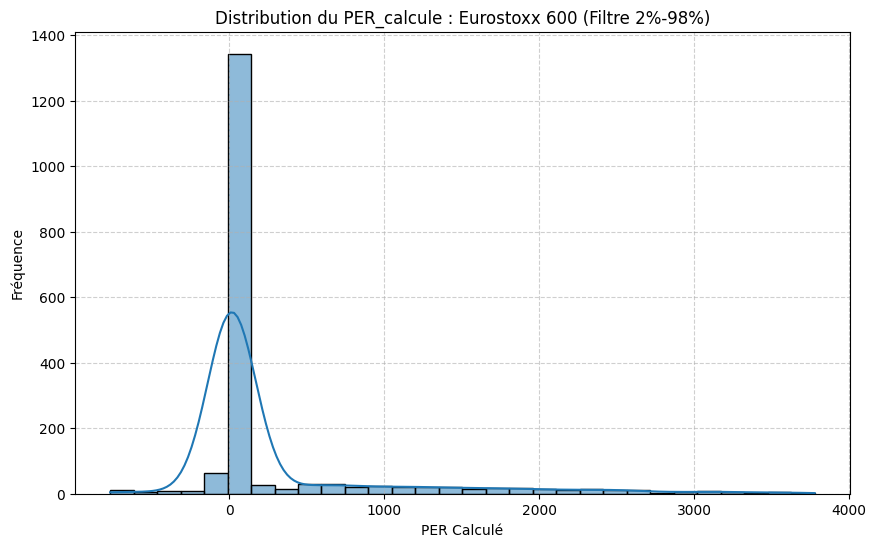

In [18]:
# Regardons la distribution de nos PER

def afficher_distribution(df, nom_dataset):
    plt.figure(figsize=(10, 6))

    # On a observé des outliers pour améliorer la visualisation on ne garde que les données entre 2% et 98% 
    q_low = df['PER_calcule'].quantile(0.02)
    q_high = df['PER_calcule'].quantile(0.98)
    df_filtered = df[(df['PER_calcule'] > q_low) & (df['PER_calcule'] < q_high)]

    sns.histplot(df_filtered['PER_calcule'], kde=True, bins=30)
    plt.title(f'Distribution du PER_calcule : {nom_dataset} (Filtre 2%-98%)')
    plt.xlabel('PER Calculé')
    plt.ylabel('Fréquence')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

afficher_distribution(df_STX600, "Eurostoxx 600")

On remarque que la majorité des valeurs sont comprises entre 0 et 50 mais il y a tout de même des valeurs aberrantes qui compliquent l'étude. On se retreint dans le cadre de notre projet à l'analyse des PER entre 0 et 50, on va donc retirer les lignes avec un PER aberrant. 

In [19]:
# Nombre de lignes avant nettoyage
print(f"Nombre de lignes avant nettoyage Eurostoxx 600 : {len(df_STX600)}")

# On ne garde que les PER entre 0 et 50
df_STX600 = df_STX600[
    (df_STX600['PER_calcule'] >= 0) & 
    (df_STX600['PER_calcule'] <= 50)
]

# Vérifions le nombre de lignes supprimées et la nouvelle distribution du PER nettoyé
print(f"Nombre de lignes après nettoyage Eurostoxx 600 : {len(df_STX600)}")
print("Statistiques du PER après nettoyage Eurostoxx 600 :")
print(df_STX600['PER_calcule'].describe())

print("-" * 30)

Nombre de lignes avant nettoyage Eurostoxx 600 : 1854
Nombre de lignes après nettoyage Eurostoxx 600 : 1208
Statistiques du PER après nettoyage Eurostoxx 600 :
count    1208.000000
mean       16.824231
std        10.309515
min         0.015429
25%         8.754390
50%        14.828194
75%        23.122656
max        49.929574
Name: PER_calcule, dtype: float64
------------------------------


Il nous reste 1223 lignes contre au départ 1994 soit 61% du jeu de données. Ces 61% sont significatifs et nous permettent de mener une étude sérieuse. 

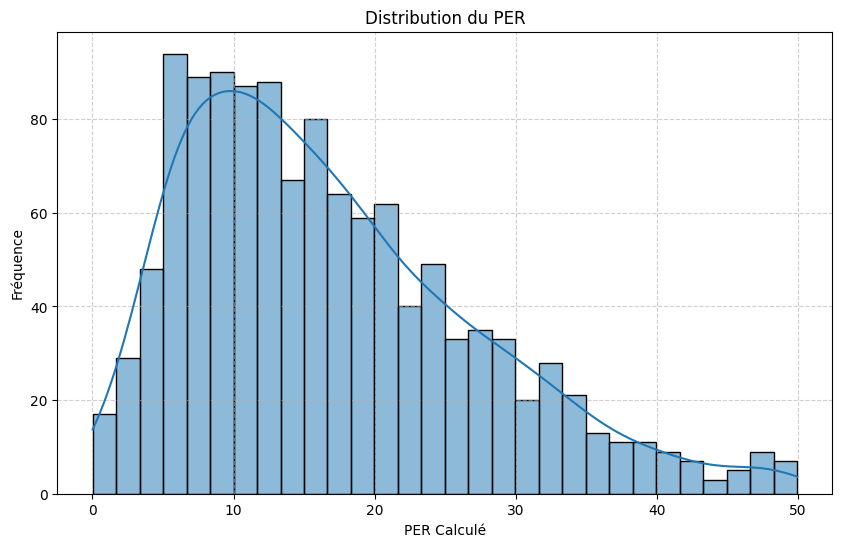

In [20]:
# Regardons maintenant la distribution de nos PER

def afficher_distribution2(df, nom_dataset):
    plt.figure(figsize=(10, 6))

    sns.histplot(df_STX600['PER_calcule'], kde=True, bins=30)
    plt.title('Distribution du PER')
    plt.xlabel('PER Calculé')
    plt.ylabel('Fréquence')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

afficher_distribution2(df_STX600, "Eurostoxx 600")

Nous avons maintenant un data frame que nous pouvons utiliser pour mener notre étude.

In [21]:
df_STX600.head()

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,NetIncomeBN,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut
3,1COV,1COV.DE,Covestro AG,Eurostoxx,2021,2021-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,1.616000,15.903000,7.696000,15.571000,2.528000,1.30,0.225463,10.161605,32.848233,15.531661
4,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2024,2024-12-31,Communication Services,Telecom Services,Germany,0.410,...,0.212764,4.064254,6.093970,8.130073,0.412959,0.05,0.013964,5.235007,6.776518,4.132231
5,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2023,2023-12-31,Communication Services,Telecom Services,Germany,0.410,...,0.314950,4.096701,5.887074,7.740306,0.188507,0.05,0.024756,7.687893,3.202049,2.793296
6,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2022,2022-12-31,Communication Services,Telecom Services,Germany,0.410,...,0.367328,3.963691,5.579841,7.257085,0.102669,0.05,0.016834,9.267322,1.839999,2.403846
7,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2021,2021-12-31,Communication Services,Telecom Services,Germany,0.410,...,0.370022,3.909659,5.219201,7.063730,0.102285,0.05,0.035485,9.464304,1.959783,2.380952


In [22]:
# Sort the DataFrame by Ticker and AnneeFiscale to ensure correct year-over-year calculation
df_STX600 = df_STX600.sort_values(by=['Ticker', 'AnneeFiscale'])

# Calculate the year-over-year EPS growth for each company
df_STX600['Croissance de l\'EPS (en %)'] = df_STX600.groupby('Ticker')['EPS'].pct_change() * 100 #fonction pour calculer la xce yoy

# Display the relevant columns to show the new calculation
display(df_STX600[['Ticker', 'AnneeFiscale', 'EPS', 'Croissance de l\'EPS (en %)']].head(10))

,Ticker,AnneeFiscale,EPS,Croissance de l'EPS (en %)
3,1COV,2021,8.370000,NaN
7,1U1,2021,2.100000,NaN
6,1U1,2022,2.080000,-0.952381
5,1U1,2023,1.790000,-13.942308
4,1U1,2024,1.210000,-32.402235
11,A2A,2021,0.163900,NaN
10,A2A,2022,0.128100,-21.842587
9,A2A,2023,0.210100,64.012490
8,A2A,2024,0.275782,31.262256
15,AAK,2021,5.590000,NaN


Enfin, regardons s'il y a des lignes en double. Cela serait possible notamment si une entreprise émet plusieurs classes d'actions, et donc qu'elle est trouvable sous deux tickers distincts. Pour étudier les doublons, regardons les entreprises qui ont le même NetIncome et le même EPS. (On ne peut pas regarder si elles ont le même tickers puisque tout le problème vient du fait qu'elles ont deux tickers distincts).

In [23]:
# 2. On repère les doublons sur la combinaison (NetIncomeBN, PER)
# On passe une liste de colonnes à 'subset'
masque_doublons = df_STX600.duplicated(subset=['NetIncomeBN', 'Beta'], keep=False)

# 3. On filtre le DataFrame et on trie par les DEUX colonnes pour grouper les paires
resultat = df_STX600[masque_doublons].sort_values(by=['NetIncomeBN', 'Beta'])

print(f"Nombre de lignes concernées : {len(resultat)}")
# On affiche le résultat (on peut utiliser display() si tu es dans un notebook Jupyter)
resultat.head(30)

Nombre de lignes concernées : 2


,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
1363,PST,PST.MI,Poste Italiane S.p.a,Eurostoxx,2021,2021-12-31,Industrials,Conglomerates,Italy,0.718,...,31.639,12.102,284.728,16.777,0.509,0.675927,4.987515,138.629979,41.927512,NaN
1362,PST,PST.MI,Poste Italiane S.p.a,Eurostoxx,2022,2022-12-31,Industrials,Conglomerates,Italy,0.718,...,18.280,7.834,262.074,13.406,0.615,0.659369,8.632385,171.125862,50.658979,0.0


En explorant les données, on a trouvé une valeur aberrante qu'on supprime.

In [24]:
# 1. Filtrer le DataFrame pour ne garder que le secteur 'Utilities'
utilities_df_STX600 = df_STX600[df_STX600['Sector'] == 'Utilities']

# 2. Trouver la ligne avec la valeur maximale dans la colonne '%MargeNette'
# Utilisation de idxmax() pour récupérer l'index de la valeur max
index_max = utilities_df_STX600['%MargeNette'].idxmax()
ligne_max = df_STX600.loc[index_max]

# Suppression de la ligne en utilisant l'index trouvé
df_STX600 = df_STX600.drop(index_max)

# Vérification : afficher la taille du df pour confirmer la suppression
print(f"Ligne supprimée. Nouvelle taille du df : {df_STX600.shape}")

Ligne supprimée. Nouvelle taille du df : (1207, 29)


On n'a pas ici de problème d'entreprise qui a deux classes d'actions.

In [25]:
# On filtre, on trie par ordre décroissant (ascending=False), et on prend les 5 premières valorisations boursières du STX600 en 2024
top_10_equity_STX600 = df_STX600[df_STX600['AnneeFiscale'] == 2024].sort_values(by='MarketCapitalizationBN', ascending=False).head(10)
top_10_equity_STX600.head(5)

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
201,ATO,ATO.PA,Atos SE,Eurostoxx,2024,2024-12-31,Technology,Information Technology Services,France,1.643,...,9.577,0.799,8.246,2.811,0.0,0.014822,2.589537,351.814768,0.000000,NaN
971,INVE B,INVE-B.ST,Investor AB - Class B Shares,Eurostoxx,2024,2024-12-31,Financial Services,Asset Management,Sweden,0.787,...,168.909,819.364,952.090,98.937,4.8,0.610232,67.100036,12.074853,12.972973,-10.800386
193,ATCO A,ATCO-A.ST,Atlas Copco AB - Class A Shares,Eurostoxx,2024,2024-12-31,Industrials,Specialty Industrial Machinery,Sweden,0.937,...,176.771,113.700,208.538,34.708,2.8,0.941863,16.847786,30.525945,45.826514,6.076389
1926,VOLV B,VOLV-B.ST,Volvo AB - Class B Shares,Eurostoxx,2024,2024-12-31,Industrials,Farm & Heavy Construction Machinery,Sweden,0.880,...,526.816,194.048,714.564,258.851,18.0,0.743307,9.564820,133.395345,72.639225,1.142857
185,ASSA B,ASSA-B.ST,Assa Abloy AB - Class B Shares,Eurostoxx,2024,2024-12-31,Industrials,Security & Protection Services,Sweden,0.828,...,150.162,107.071,223.605,73.501,5.4,0.357249,10.414752,68.646973,38.352273,14.751426


In [27]:
# Sélectionner toutes les lignes où la colonne YahooTicker est égale à 'ATO.PA'
lignes_ato = df_STX600[df_STX600['YahooTicker'] == 'ATO.PA']

# Afficher le résultat
lignes_ato

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
201,ATO,ATO.PA,Atos SE,Eurostoxx,2024,2024-12-31,Technology,Information Technology Services,France,1.643,...,9.577,0.799,8.246,2.811,0.0,0.014822,2.589537,351.814768,0.0,NaN


On remarque un problème avec Atos. On n'a que 2024 pour Atos, on drop cette année. 

In [28]:
# On drop Atos
df_STX600= df_STX600[df_STX600['YahooTicker'] != 'ATO.PA']

In [29]:
import os

# On sauvegarde dans le même dossier que le notebook actuel
# index=False : évite de créer une colonne pour les numéros de ligne (0, 1, 2...)
# encoding='utf-8-sig' : assure que les accents s'affichent bien (surtout pour Excel)
df_STX600.to_csv("df_Eurostoxx_clean.csv", index=False, encoding='utf-8-sig')

print("Fichier CSV sauvegardé avec succès !")

Fichier CSV sauvegardé avec succès !
